## **Reseñas de cerveza de Beer Advocate**

#### **Acerca de este conjunto de datos**

¿Te encanta la cerveza? ¿Te encanta probar nuevas cervezas y calificarlas? ¡Pues este conjunto de datos es perfecto para ti! Contiene 1,5 millones de reseñas de cervezas de Beer Advocate, lo que lo hace ideal para poner a prueba tus habilidades con los datos. Los datos incluyen calificaciones en función de cinco aspectos: apariencia, aroma, paladar, sabor e impresión general. Las reseñas también incluyen información sobre el producto y el usuario. ¿A qué estás esperando? ¡Empieza hoy mismo!

#### **Cómo utilizar el conjunto de datos**

Este gran conjunto de datos de Beer Advocate consta de 1,5 millones de reseñas de cerveza, lo que lo hace ideal para poner a prueba las habilidades con los datos. Los datos incluyen calificaciones en función de cinco aspectos: apariencia, aroma, paladar, sabor e impresión general. Las reseñas también incluyen información sobre el producto y el usuario.

Para utilizar este conjunto de datos de forma eficaz, es importante comprender la estructura de los datos y las relaciones entre las diferentes columnas. La columna 'brewery_name' es un buen punto de partida para explorar los datos, ya que proporciona una descripción general de todas las cervecerías representadas en el conjunto de datos. A partir de ahí, es posible encontrar reseñas de cervecerías específicas mediante las columnas 'review_time' y 'review_profilename'.

La columna 'beer_style' también es importante, ya que proporciona información sobre el tipo de cerveza de cada reseña. Esto se puede utilizar para filtrar los datos de modo que solo se tengan en cuenta las reseñas de un determinado tipo de cerveza. Además, la columna 'beer_abv' se puede utilizar para averiguar qué cervezas tienen mayor o menor contenido de alcohol.

Por último, las columnas 'review_overall', 'review_aroma', 'review_appearance', 'review_palate' y 'review_taste' contienen calificaciones para cada aspecto de la cerveza que se está evaluando. Estas calificaciones se pueden utilizar para comparar diferentes cervezas o para determinar qué aspectos son los más importantes para los evaluadores.

#### **Ideas de investigación**

Desarrollar un modelo para predecir la probabilidad de que una cerveza sea evaluada mucho antes de ser creada.
Cómo crear un sistema de recomendación de cerveza
Cree una aplicación web que utilice el conjunto de datos para ayudar a los usuarios a encontrar cervecerías cercanas según sus preferencias de sabor.

#### **Expresiones de gratitud**

Me gustaría agradecer a [Beer Advocate](https://www.beeradvocate.com/) por proporcionar este conjunto de datos.



## **Diccionario**

|**Nombre**|**Descricion**|**Tipo**|
|----|-----------|----|
|brewery_id|Identificador de la cervecería que elaboró la cerveza|int64|
|brewery_name|El nombre de la cervecería que elaboró ​​la cerveza|String|
|review_time|La fecha y hora de la revisión|String|
|review_overall|La calificación general que el revisor le da a la cerveza en una escala del 1 al 5|Float|
|review_aroma|La calificación del revisor sobre el aroma de la cerveza en una escala del 1 al 5|Float|
|review_appearance|La calificación del crítico sobre la apariencia de la cerveza en una escala del 1 al 5|Float|
|review_profilename|El nombre de usuario del revisor|String|
|beer_style|El estilo de la cerveza|String|
|review_palate|La calificación del crítico sobre el paladar de la cerveza en una escala del 1 al 5|Float|
|review_taste|La calificación del crítico sobre el sabor de la cerveza en una escala del 1 al 5|Float|
|beer_name|El nombre de la cerveza|Cadena|
|beer_abv|El alcohol por volumen de la cerveza|Float|
|beer_beerid|Identificador del tipo de cerveza|int64|

In [19]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import requests
from io import StringIO

In [ ]:
# Importar dataset
df_raw = pd.read_csv("../data/raw/beer_reviews.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [13]:
df_raw.sample(10, random_state=42)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
859964,859964,13307,Mikkeller ApS,1317606533,4.0,4.5,4.5,Ghenna,American Barleywine,3.5,3.5,Big Worst,18.50,56831
581443,581443,126,Pete's Brewing Company,1195281294,2.5,3.0,3.5,hwwty4,Cream Ale,3.0,2.5,Pete's Wicked Wanderlust Cream Ale,5.60,19950
1270456,1270456,203,Greene King / Morland Brewery,1224109943,4.0,3.5,4.0,dsa7783,English Pale Ale,3.5,3.5,Abbot Ale,5.00,910
477415,477415,167,Brewery Lobkowicz,1070489226,4.5,4.0,3.5,TastyTaste,Czech Pilsener,4.0,4.5,Lobkowicz Knight,4.80,444
1408999,1408999,664,Wells & Young's Ltd,1172208746,5.0,4.0,5.0,BadRockBeer,Milk / Sweet Stout,5.0,5.0,Young's Double Chocolate Stout,5.20,73
640888,640888,30,Avery Brewing Company,1161643310,3.5,4.5,4.5,AaronHomoya,Quadrupel (Quad),4.0,4.0,The Reverend,10.00,2014
366834,366834,22,Unibroue,1215184654,3.0,2.5,3.0,cvstrickland,Fruit / Vegetable Beer,3.0,3.0,Éphémère (Apple),5.50,3523
1279880,1279880,224,St. Pauli Brauerei C.L. Wilh. Brandt Gmbh & Co.,1276036822,2.0,2.5,3.0,PapaGemutlich,Munich Dunkel Lager,3.0,2.5,St. Pauli Girl Special Dark,4.80,698
1188553,1188553,10099,Dogfish Head Brewery,1192893550,3.5,4.5,4.0,jaxon53,American Barleywine,4.0,4.0,Olde School Barleywine,15.04,6533
571637,571637,9897,Jolly Pumpkin Artisan Ales,1288755942,4.0,4.0,4.0,Mora2000,Pumpkin Ale,4.0,4.0,La Parcela,6.00,45723


In [16]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .drop_duplicates()
    .astype({'brewery_name': 'category',
             'review_time': 'category',
             'review_profilename': 'category',
             'beer_style': 'category',
             'beer_name': 'category'

    })
)

In [17]:
display(df_interim.describe(include='number').T)
display(df_interim.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
index,1586614.0,793306.500000,458016.154338,0.00,396653.25,793306.5,1189959.75,1586613.0
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.00,429.0,2372.00,28003.0
review_overall,1586614.0,3.815581,0.720622,0.00,3.50,4.0,4.50,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.50,4.0,4.00,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.50,4.0,4.00,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.50,4.0,4.00,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.50,4.0,4.50,5.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.20,6.5,8.50,57.7
beer_beerid,1586614.0,21712.794279,21818.335997,3.00,1717.00,13906.0,39441.00,77317.0


,count,unique,top,freq
brewery_name,1586599,5742,Boston Beer Company (Samuel Adams),39444
review_time,1586614,1577960,1101772800,21
review_profilename,1586266,33387,northyorksammy,5817
beer_style,1586614,104,American IPA,117586
beer_name,1586614,56857,90 Minute IPA,3290


### **Consideraciones:**

Las columnas de:
- `brewery_id`: 
- `beer_beerid`: 

In [22]:
df = df_interim.copy()

In [23]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269291 entries, 427252 to 532104
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   index               1269291 non-null  int64   
 1   brewery_id          1269291 non-null  int64   
 2   brewery_name        1269283 non-null  category
 3   review_time         1269291 non-null  category
 4   review_overall      1269291 non-null  float64 
 5   review_aroma        1269291 non-null  float64 
 6   review_appearance   1269291 non-null  float64 
 7   review_profilename  1269020 non-null  category
 8   beer_style          1269291 non-null  category
 9   review_palate       1269291 non-null  float64 
 10  review_taste        1269291 non-null  float64 
 11  beer_name           1269291 non-null  category
 12  beer_abv            1215297 non-null  float64 
 13  beer_beerid         1269291 non-null  int64   
dtypes: category(5), float64(6), int64(3)
memory usage: 

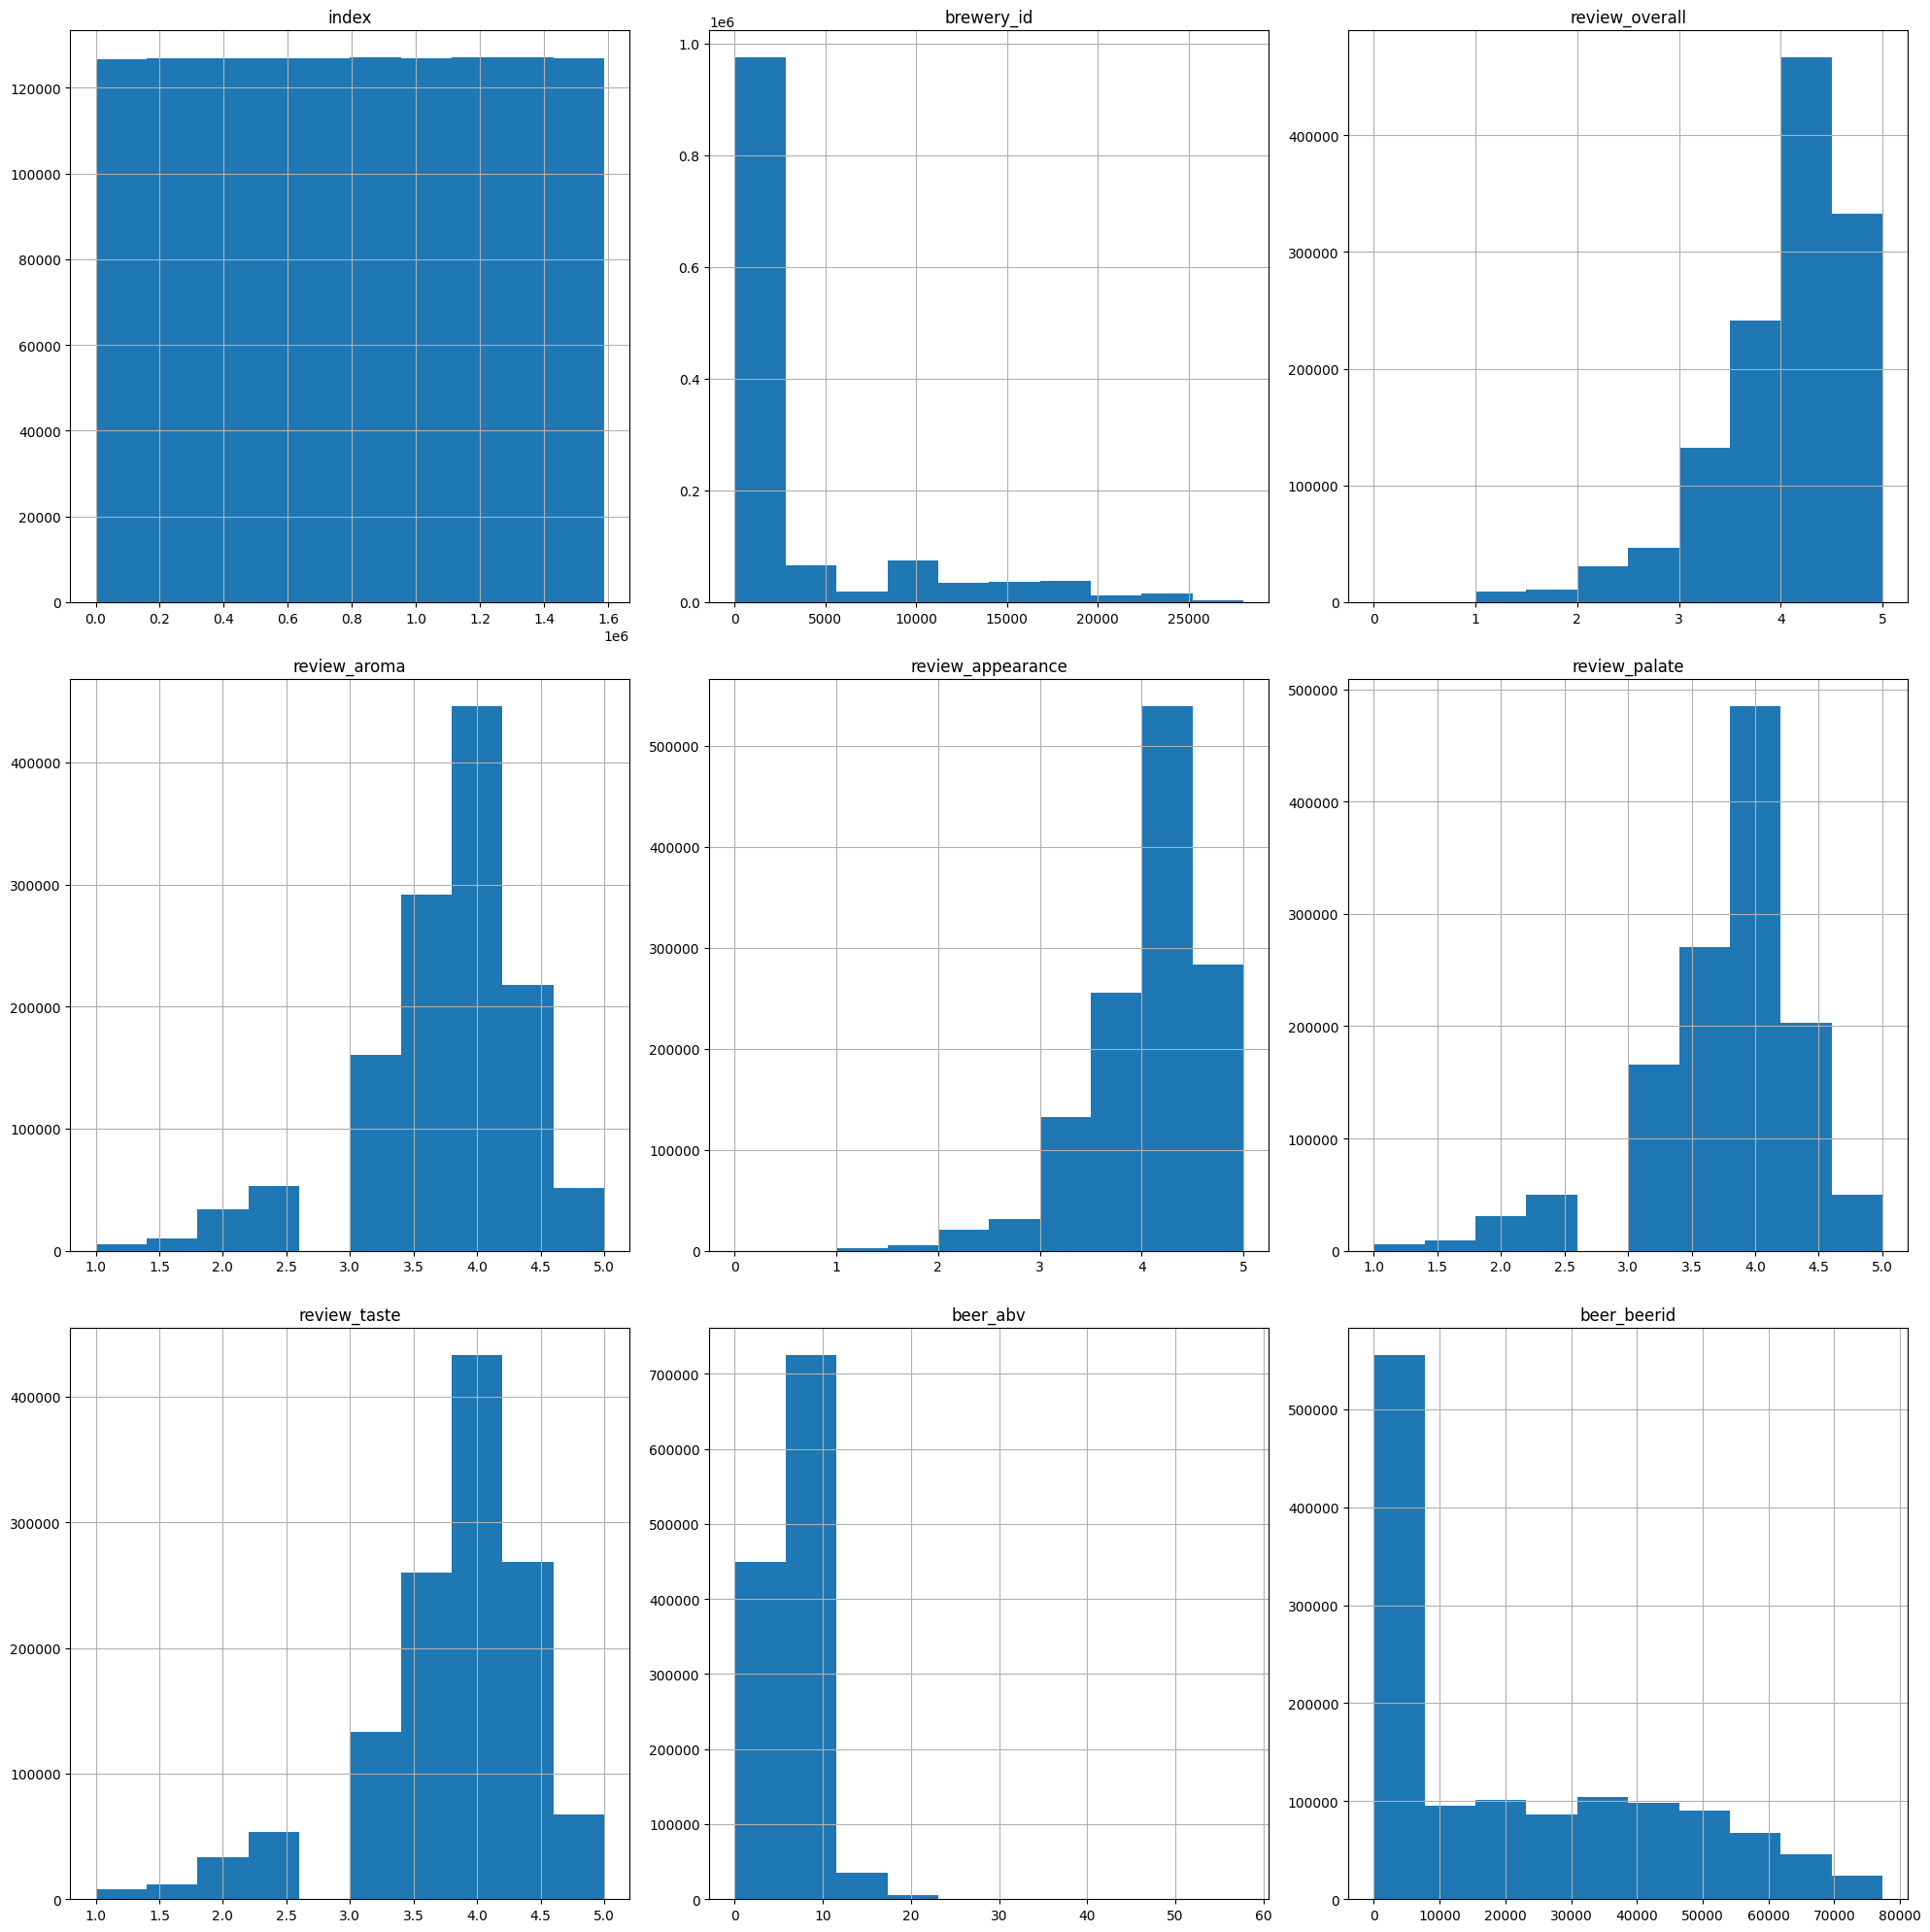

In [26]:
df_train.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

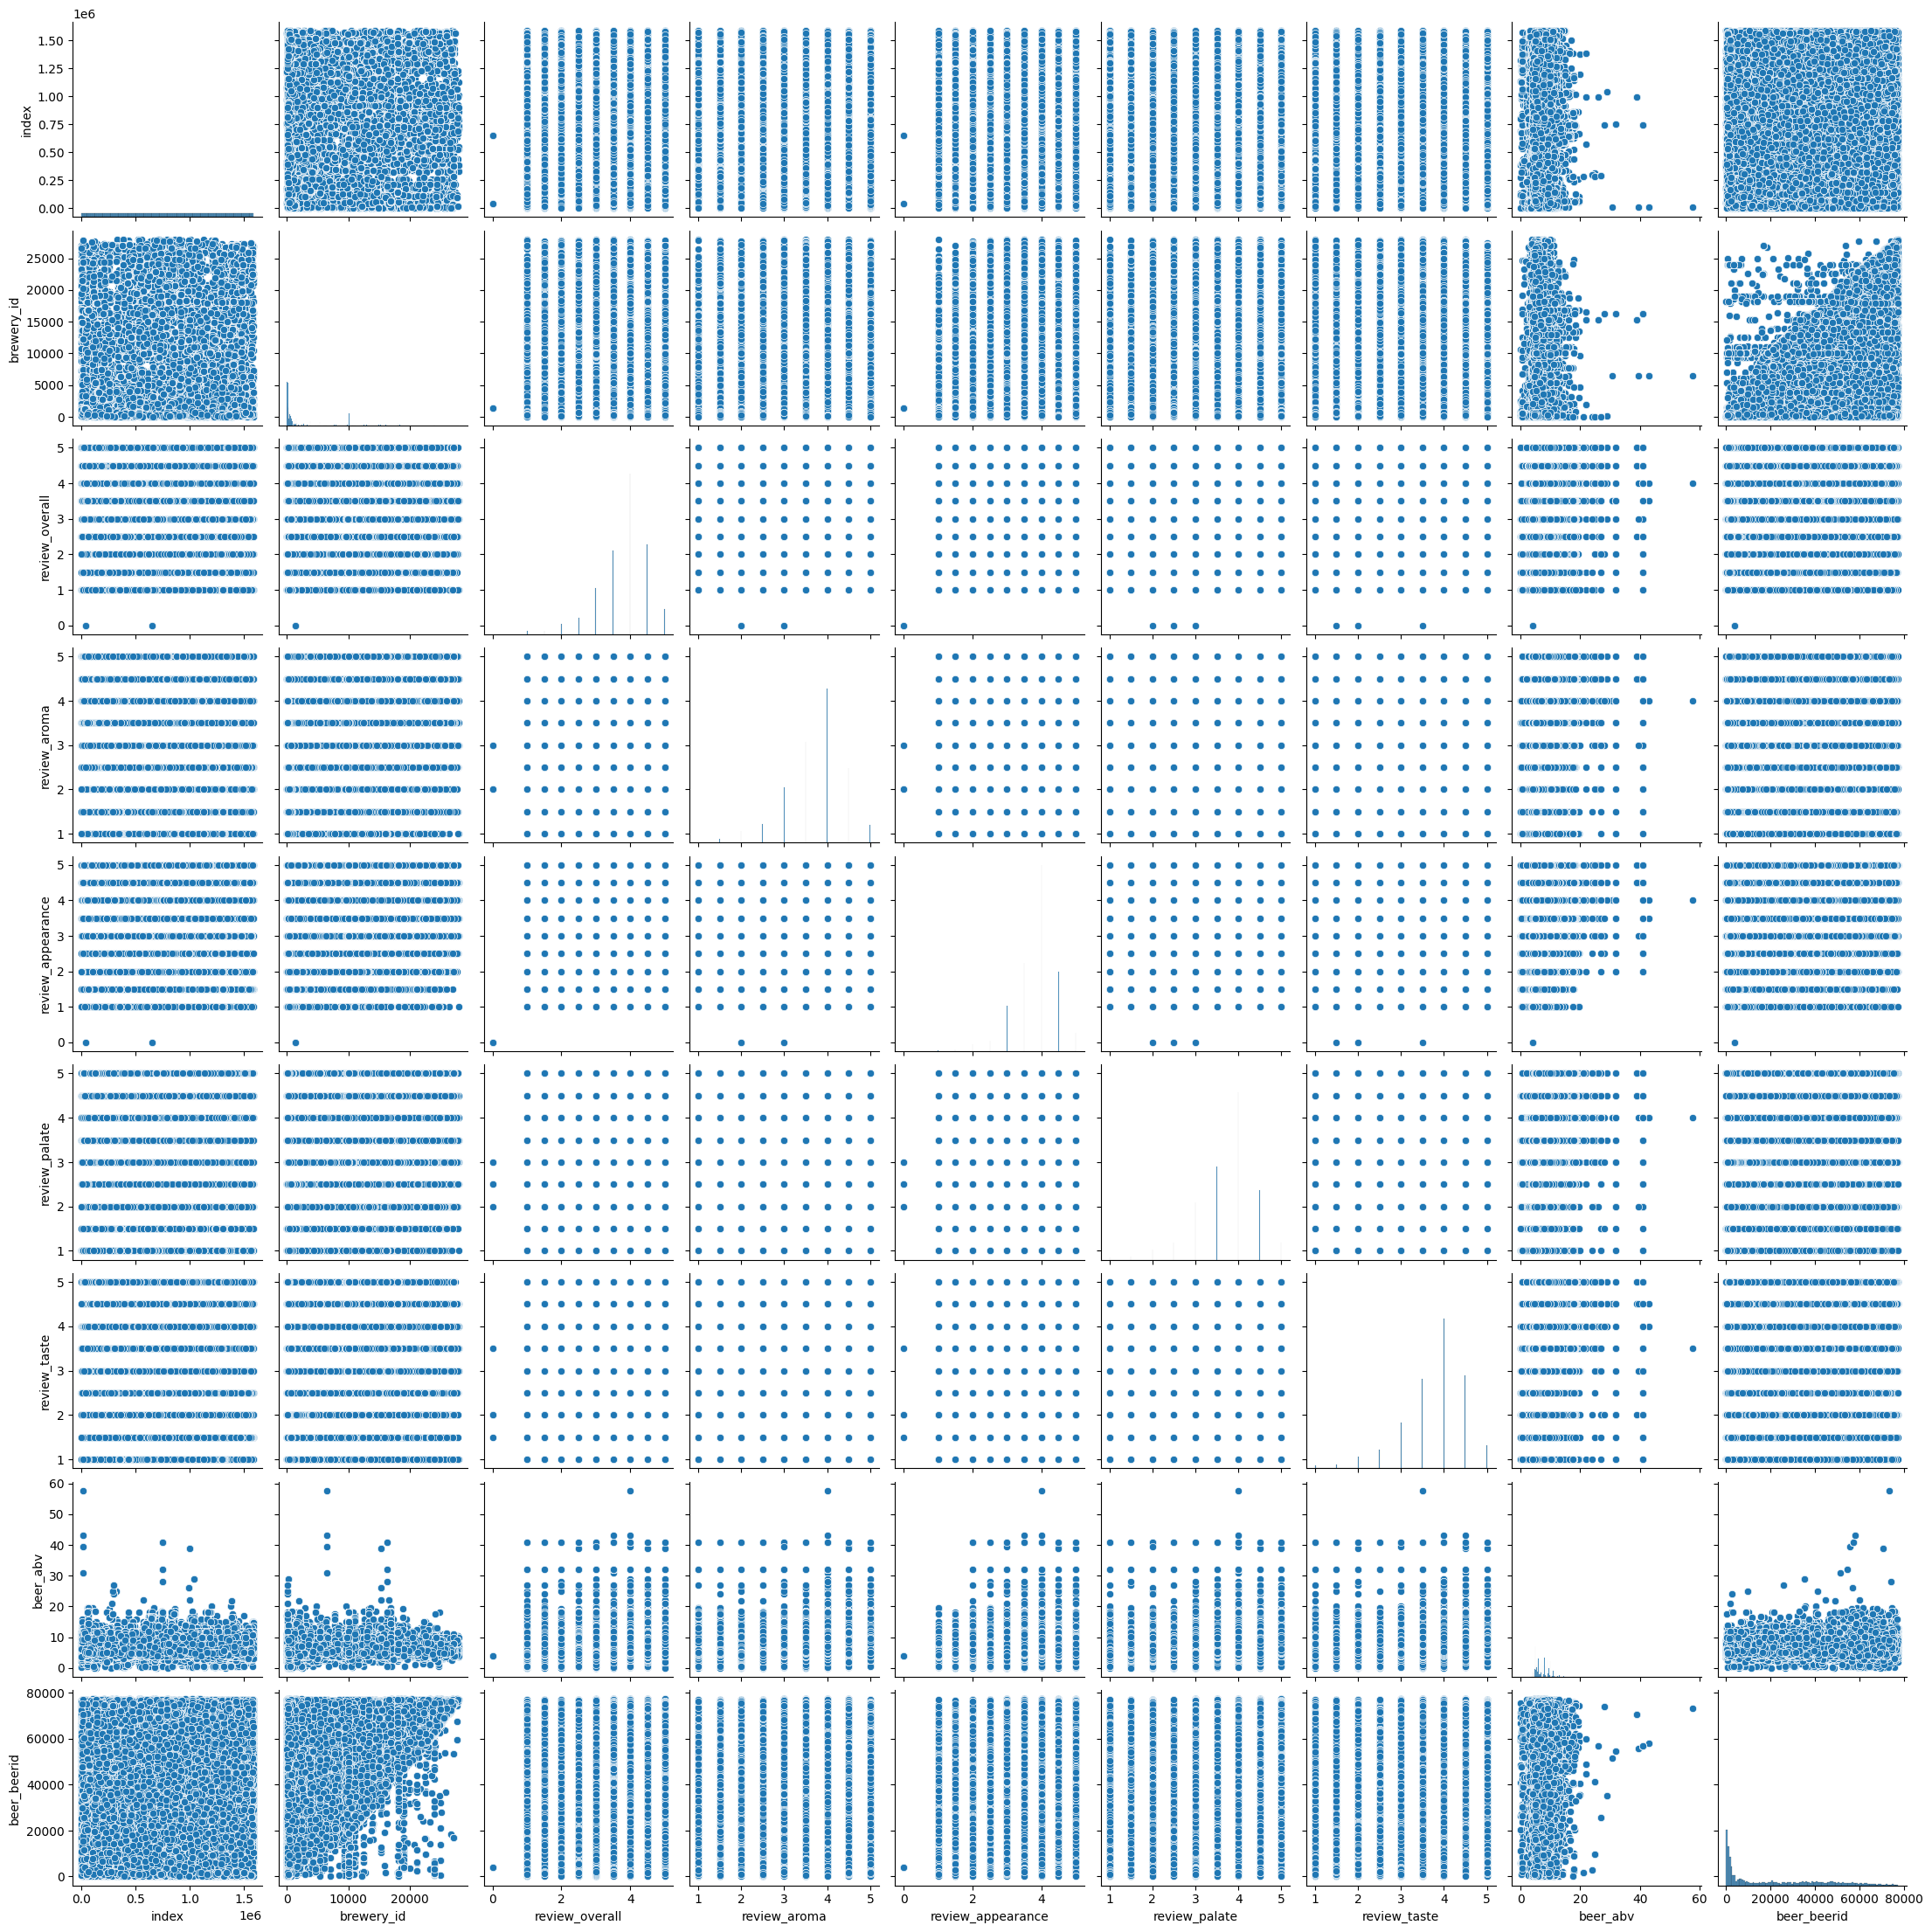

In [29]:
sns.pairplot(data=df_train)
plt.show()

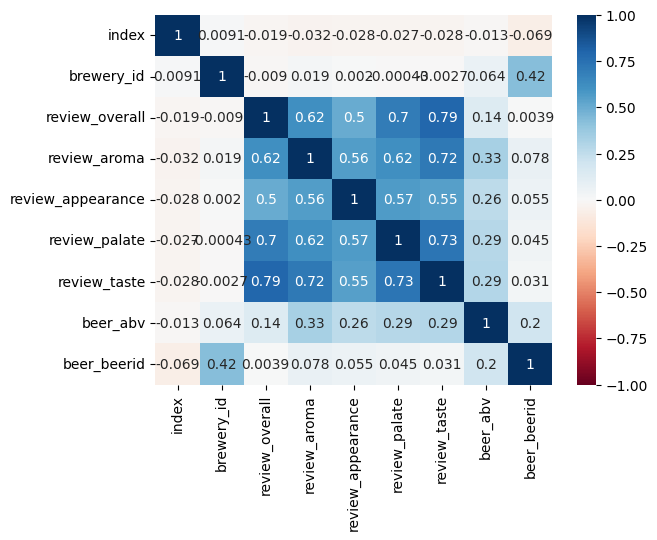

In [30]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()